In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x, y = data[0][0], data[1][0]

print(y)

tensor(1)


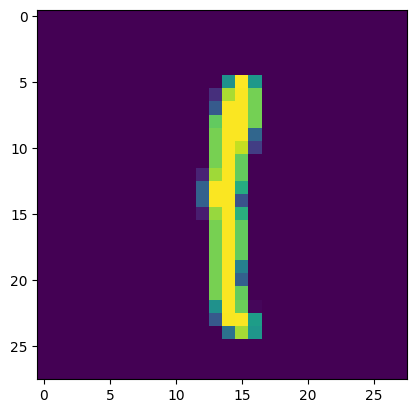

In [12]:
plt.imshow(data[0][0].view(28, 28))
plt.show()

In [14]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)]+=1
        total+=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [15]:
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/total*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
X = torch.rand((28, 28))

In [20]:
X

tensor([[5.1777e-01, 5.6057e-01, 5.4526e-01, 2.7875e-01, 5.3579e-01, 1.8222e-01,
         6.7889e-01, 6.1489e-01, 3.9304e-01, 2.6743e-02, 3.2452e-01, 4.1948e-02,
         9.0228e-01, 2.8479e-01, 9.6875e-01, 9.4827e-01, 8.6455e-01, 2.9866e-01,
         2.2157e-01, 1.4542e-01, 2.5618e-01, 8.9006e-01, 6.6985e-01, 3.6363e-01,
         4.1043e-01, 4.8893e-01, 8.0892e-01, 5.3092e-01],
        [6.6447e-02, 1.0769e-01, 6.7029e-02, 8.5034e-01, 2.7320e-01, 3.0434e-02,
         2.4161e-01, 7.9926e-01, 8.3769e-01, 1.0250e-01, 8.5718e-03, 8.8158e-01,
         2.9519e-01, 5.9893e-01, 5.6856e-01, 4.0625e-01, 5.1346e-02, 6.3113e-01,
         3.2784e-02, 4.1835e-01, 2.1573e-02, 6.6157e-01, 6.7502e-01, 2.9693e-01,
         3.9051e-01, 8.0744e-01, 6.9418e-01, 2.0224e-01],
        [1.1800e-01, 3.7447e-01, 8.4823e-01, 9.0174e-01, 4.5953e-01, 7.8476e-02,
         7.0975e-01, 6.9774e-01, 6.4302e-01, 7.7097e-01, 8.5938e-01, 8.1447e-01,
         8.3359e-01, 2.9128e-01, 9.0830e-01, 1.7770e-01, 6.8656e-02, 8.745

In [23]:
X = X.view(-1, 28*28)
output = net(X)

In [24]:
output

tensor([[-2.3840, -2.3652, -2.2510, -2.3051, -2.1948, -2.2533, -2.3428, -2.2581,
         -2.2657, -2.4300]], grad_fn=<LogSoftmaxBackward0>)